# HEALTH INSURANCE CROSS SELL PREDICTION

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

## Why I chose health insurance cross sell prediction?

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

### What are the insights I want to retrieve from the dataset?
	How many people give positive response and negative response?
	Prediction of ratio of gender count for data.
	Which age has the maximum frequency?
	What is the driving licence count for  data?
	What is the percentage of people who took the insurance previously? Also visualise the same.
	How old is the vehicle and what is the count of it?
	What is the count of vehicle with damage?
	Check whether the age column is normalised or not.
	Find the correlation between all the attributes.
	Check whether the age column and vintage column have skewed data or not.


### Column description

- id: Unique ID for the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Driving_License 0 : Customer does not have DL, 1 : Customer already has DL
- Region_Code: Unique code for the region of the customer
- Previously_Insured - 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- Vehicle_Age Age of the Vehicle
- Vehicle_Damage 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium The amount customer needs to pay as premium in the year
- PolicySalesChannel Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage Number of Days, Customer has been associated with the company
- Response 1 : Customer is interested, 0 : Customer is not interested

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

- Numpy and Pandas library are used to work with the dataset
- Seaborn and Matplotlib is used for data visualization

In [74]:
#Reading the csv file
train=pd.read_csv(r"C:\Users\Farheen\Desktop\TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [75]:
# Reading the top 5 rows of the csv file
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [76]:
# Reading the last 5 rows of the csv file
train.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


## Checking for descriptive statistics

In [77]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Overview of the columns in the dataset

In [78]:
# Fetching the columns of the dataset
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [79]:
# Getting information about the columns of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### There are 3 columns having float datatype , 6 columns of having int datatype and 3 are of categorical types.

In [80]:
train.shape

(381109, 12)

#### There are 381109 rows and 12 columns.


## Check for null values

In [81]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### We can see that there is no missing values in our dataset. Thus we do not need to impute any values and can proceed for further analysis




## Exploratory Data Analysis

## Analysis of Response Column

In [82]:
# Getting all the value counts of the features present in the response column
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

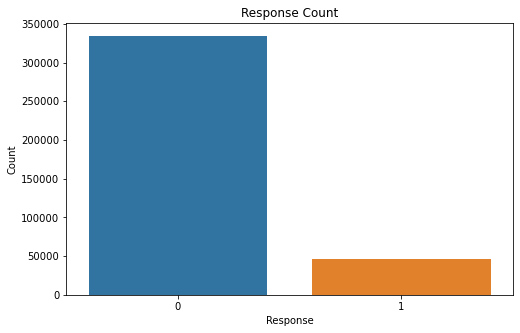

In [83]:
# How many people give positive response and negative response?
plt.figure(figsize=(8,5))
sns.countplot(train['Response'])
plt.title('Response Count')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

#### From the above plot and count , we can see that there are 334399 people with negative response and 46710 people with positive response. 

In [84]:
# Prediction of ratio of gender count
train['Gender'].value_counts(normalize= True)*100 # normalize is used to scale the value between 0 and 1.

Male      54.07613
Female    45.92387
Name: Gender, dtype: float64

#### There are more males than females in the dataset

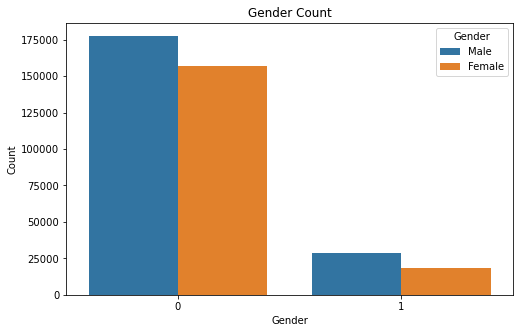

In [85]:
# Counting the number of males and females
plt.figure(figsize=(8,5))
sns.countplot(train['Response'],hue=train['Gender'])
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Approximately 176000 males who gave negative response and 27000 males who gave positive response.
#### Approximately 153000 females who gave negative response and 24000 females who gave positive response.

## Analysis of Gender Column

In [86]:
# Getting all the value counts of the features present in the gender column
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

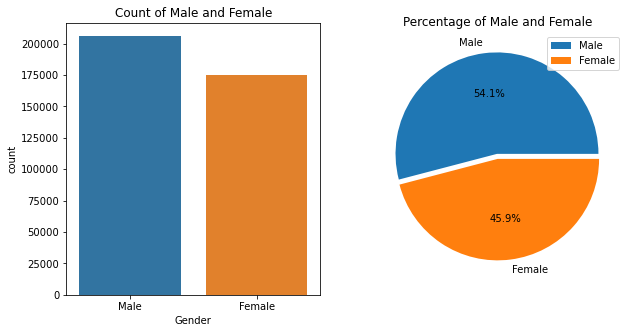

In [87]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  #Univariate Analysis
plt.title('Count of Male and Female')
sns.countplot(train['Gender'])

plt.subplot(1,2,2)
plt.pie(train['Gender'].value_counts(), explode=[0.05,0] ,autopct='%.1f%%', labels=['Male', 'Female'])
plt.title('Percentage of Male and Female')

plt.legend()
plt.show()

- 54.1 % are male
- 45.9% are female

#### Above Plots shows that Male tend to subscribe to insurence more than female.
#### There are 206089 males in the dataset that is 54.1 % of the total people.
#### There are 175020 females in the dataset that is 45.9% of the total people.

## Analysis of Age Column

Text(0, 0.5, 'Count')

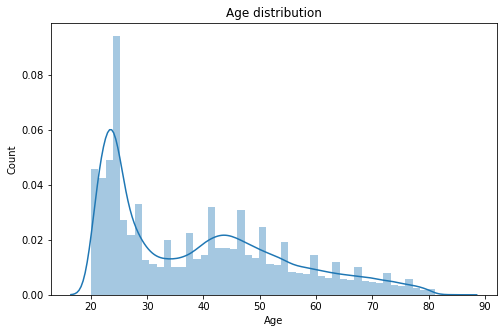

In [88]:
# Check whether the age column is normalised or not.
plt.figure(figsize=(8,5))
sns.distplot(train['Age'])
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')

#### We can see that Age distribution is not normalized. Also the maximum frequency of age is around 24

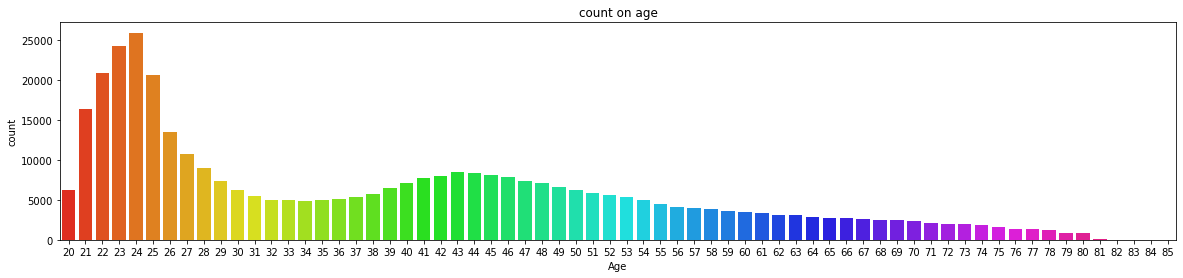

In [89]:
plt.figure(figsize=(20,4))
sns.countplot(train['Age'], palette= 'hsv')
plt.title("count on age")
plt.show()

#### People whose age is 24 are the one who are taking the insurance more.
#### The density between age 20 to 30 is high because young people tend to take insurance more than any other age group.
#### The density between age 70 to 90 is least because they are not interested in taking the health insurance.

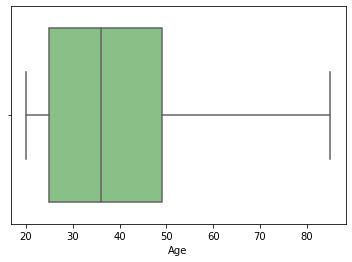

In [90]:
# Boxplot in order to check whether it has outlier or not.
sns.boxplot(train['Age'], palette= 'Accent')
plt.show()

#### As we can see that there is no outlier in the age column.
#### The minimum age is 20 and maximum is 85.
#### The first quartile is around age 25.
#### The second quartile is around age 36.
#### The third quartile is around age 49.

## Analysis of Driving License Column

In [91]:
# Getting all the value counts of the features present in the driving license column
train['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

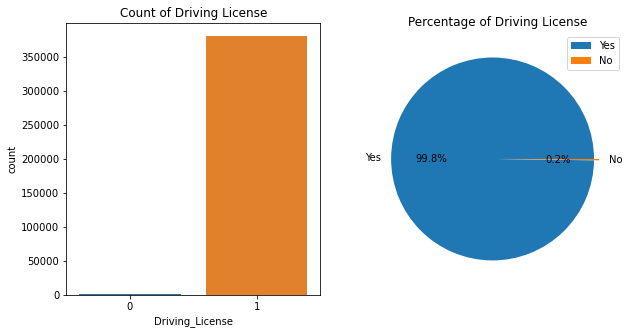

In [92]:
# What is the driving licence count?
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  #Univariate Analysis
plt.title('Count of Driving License')
sns.countplot(train['Driving_License'])

plt.subplot(1,2,2)
plt.pie(train['Driving_License'].value_counts(), explode=[0.05,0] ,autopct='%.1f%%', labels=['Yes', 'No'] , labeldistance= 1.1)
plt.title('Percentage of Driving License')

plt.legend()
plt.show()

#### So most of the people have driving licence.
#### 380297 people have driving license that is 99.8 % of the total count.
#### 812 people don’t have driving license that is 0.2 % of the total count.


## Driving License vs Response

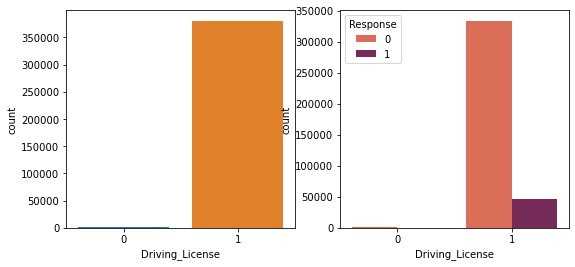

Percentage of  Driving_License feature
 
1    99.786938
0     0.213062
Name: Driving_License, dtype: float64


In [93]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(train['Driving_License'])


plt.subplot(1,2,2)
sns.countplot(train['Driving_License'], hue= train['Response'], data= train, palette= "rocket_r")
plt.show()

print("Percentage of  Driving_License feature\n ")
print(train['Driving_License'].value_counts()/len(train)*100)

#### Customers who have the DL are 99%
#### People who have DL are more interested in insurance rather than those who doesn't have DL

## Analysis of Previously Insured Column

In [94]:
# Getting all the value counts of the features present in the previously insured column
train['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

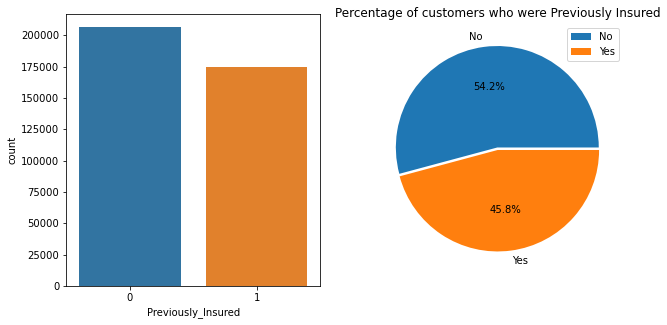

In [95]:
# What is the percentage of people who took the insurance previously?

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x = train["Previously_Insured"])

plt.subplot(1,2,2)
plt.pie(train['Previously_Insured'].value_counts(), explode=[0.025,0] ,autopct='%.1f%%', labels=['No', 'Yes'],
        labeldistance=1.1)
plt.title('Percentage of customers who were Previously Insured')
plt.legend()
plt.show()

#### We can see that more than 50% of the data is not previously Insured .
#### There are 206481 people who have not insured previously that is 54.2% of the total count.
#### There are 174628 people who have insured previously that is 45.8% of the total count.

## Previously Insured Vs Response

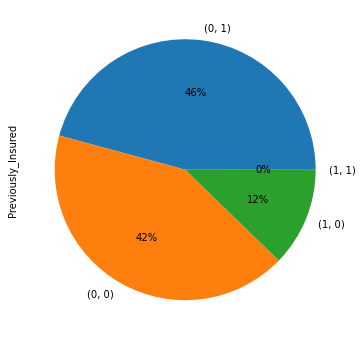

In [96]:
plt.figure(figsize=(12,6))
train.groupby(['Response'])['Previously_Insured'].value_counts().plot(
                                                 kind='pie',autopct='%.0f%%')
plt.show()

- (0,1) represent to previously insured but this time not interested
- (1,0) represent to previously not insured but this time interested
- (0,0) represent neither previously nor this time interested

## Analysis of Vehicle Age Column

In [27]:
# Getting all the value counts of the features present in the vehicle age column
train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

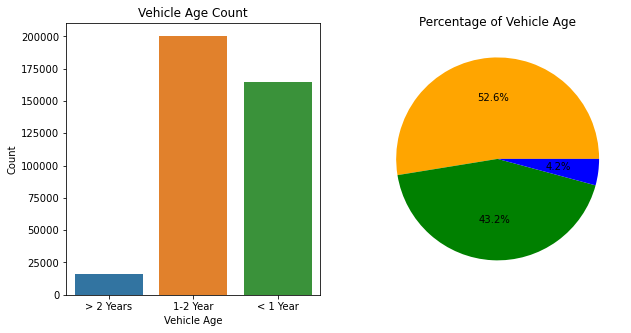

In [28]:
# How old is the vehicle and what is the count of it?
plt.figure(figsize=(10,5) )

plt.subplot(1,2,1)
sns.countplot(train["Vehicle_Age"])
plt.title('Vehicle Age Count')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(train['Vehicle_Age'].value_counts(), autopct='%.1f%%', colors = ["Orange", "Green" ,"Blue"],
        labeldistance=1.1 )
plt.title('Percentage of Vehicle Age')
plt.show()

#### So we can see that most of the vehicles are pretty new with maximum of 1-2 years and less than a year's age
#### There are 200316 vehicles of age 1-2 year that is 52.6 % of the total vehicles.
#### There are 164786 vehicles of age less than 1 year that is 43.2 % of the total vehicles.
#### There are 16007 vehicles of age more than 2 year that is 4.2 % of the total vehicles.

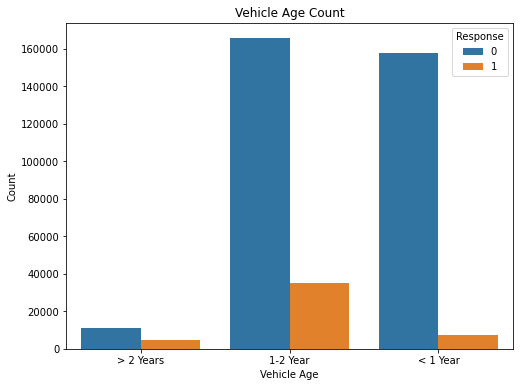

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(train['Vehicle_Age'],hue=train['Response'])
plt.title('Vehicle Age Count')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()

#### We can see that buyers whose vehicle are between 1 to 2 years are more entrusted to buy insurance rather whose vehicle are less than 1 year or more than 2 years.

## Vehicle Damage Column

In [42]:
# Getting all the value counts of the features present in the vehicle damage column
train['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

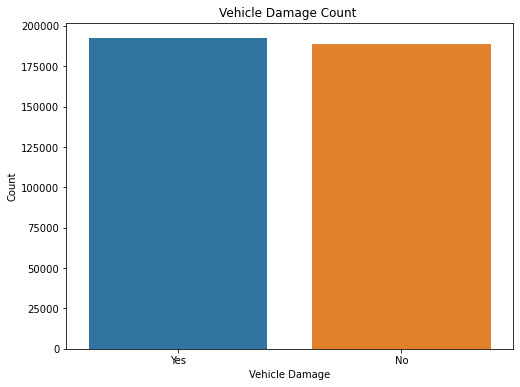

In [30]:
# What is the count of vehicle with damage?
plt.figure(figsize=(8,6))
sns.countplot(train['Vehicle_Damage'])
plt.title('Vehicle Damage Count ')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

#### From the above barplot we can see that  number of records of damaged and non-damaged vehicles is approximately equal.
#### There are 192413 vehicles that are damaged.
#### There are 188696 vehicles that are not damaged.

Text(0, 0.5, 'Count')

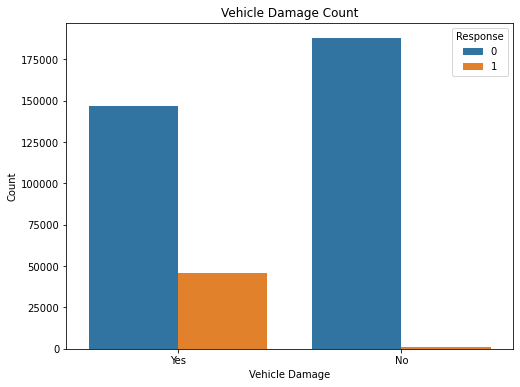

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(train['Vehicle_Damage'],hue=train['Response'])
plt.title('Vehicle Damage Count')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')

#### We can see that vehicles with Damage has more number of responses than vehicles without damage

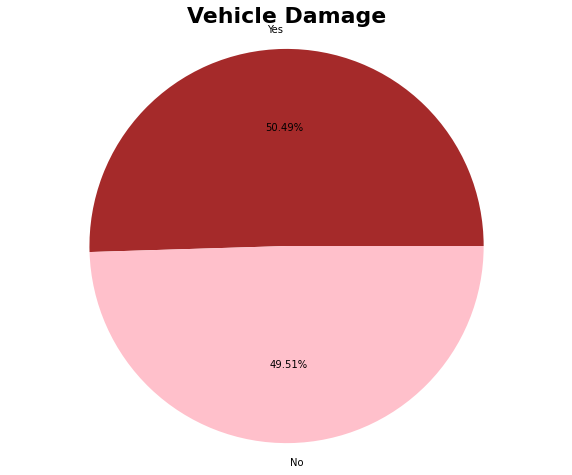

In [72]:
plt.figure(figsize=(10,8))
plt.pie(train.Vehicle_Damage.value_counts(),autopct='%.2f%%',colors=["Brown" , "Pink"],radius=1,labels=['Yes','No'])
plt.title('Vehicle Damage',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

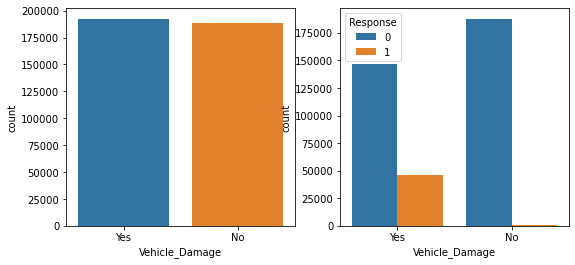

In [32]:
#Damage Vehicle and Response

plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Damage'])


plt.subplot(1,2,2)
sns.countplot(train['Vehicle_Damage'], hue= train['Response'])

#### Customers with vehicle damage are equallly distributed
#### Customers with vehicle damage are more interested in the insurance

## Analysis of Annual Premium Column

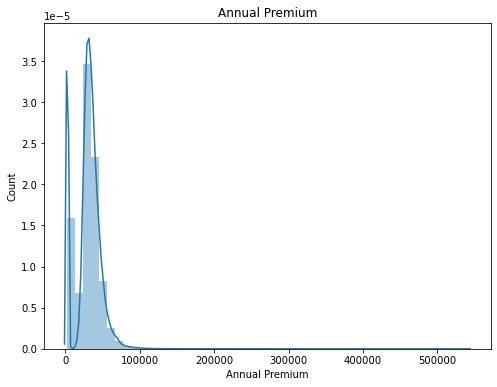

In [33]:
plt.figure(figsize=(8,6))
sns.distplot(train['Annual_Premium'])
plt.title('Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Count')
plt.show()

#### As it can be seen from the distribution plot that maximum annual premium is between 0 to 1lakh.

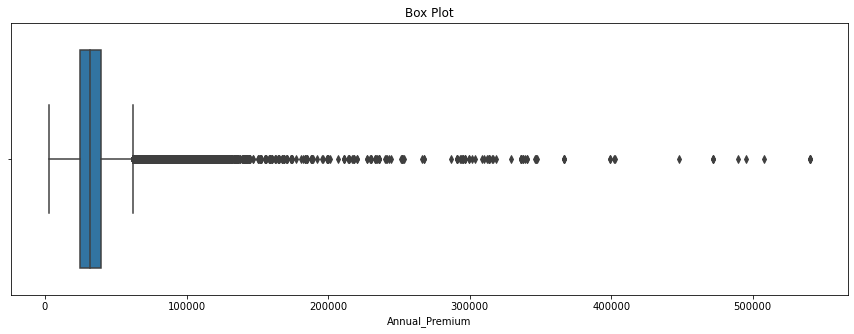

In [28]:
plt.figure(figsize = (15,5))
sns.boxplot(train['Annual_Premium'])
plt.title('Box Plot')
plt.show()


#### There are huge number of outliers in the Annual Premium column.
#### From the distribution plot we can infer that the annual premium variable is right skewed


## Analysis of Policy Sales Channel Column

In [29]:
train['Policy_Sales_Channel'].nunique()

155

#### • There are 155 unique channels to reach the customer.


Text(0, 0.5, 'Count')

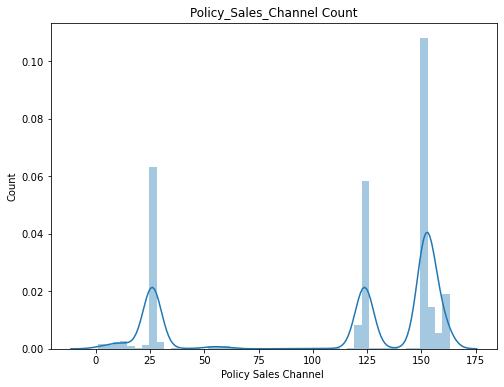

In [30]:
plt.figure(figsize=(8,6))
sns.distplot(train['Policy_Sales_Channel'])
plt.title('Policy_Sales_Channel Count')
plt.xlabel('Policy Sales Channel ')
plt.ylabel('Count')

#### • 150 is the most frequent channel used to reach out the customer


## Analysis of Vintage Column

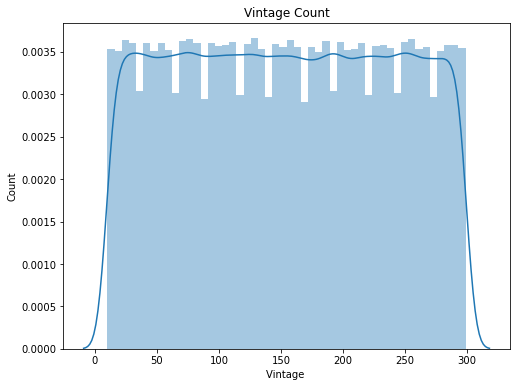

In [44]:
plt.figure(figsize=(8,6))
sns.distplot(train['Vintage'])
plt.title('Vintage Count')
plt.xlabel('Vintage ')
plt.ylabel('Count')
plt.show()

#### This Column is uniformly distributed we can't do nothing much to this column
#### Vintage= Number of Days, Customer has been associated with the company


## Analysis of Region Code Column

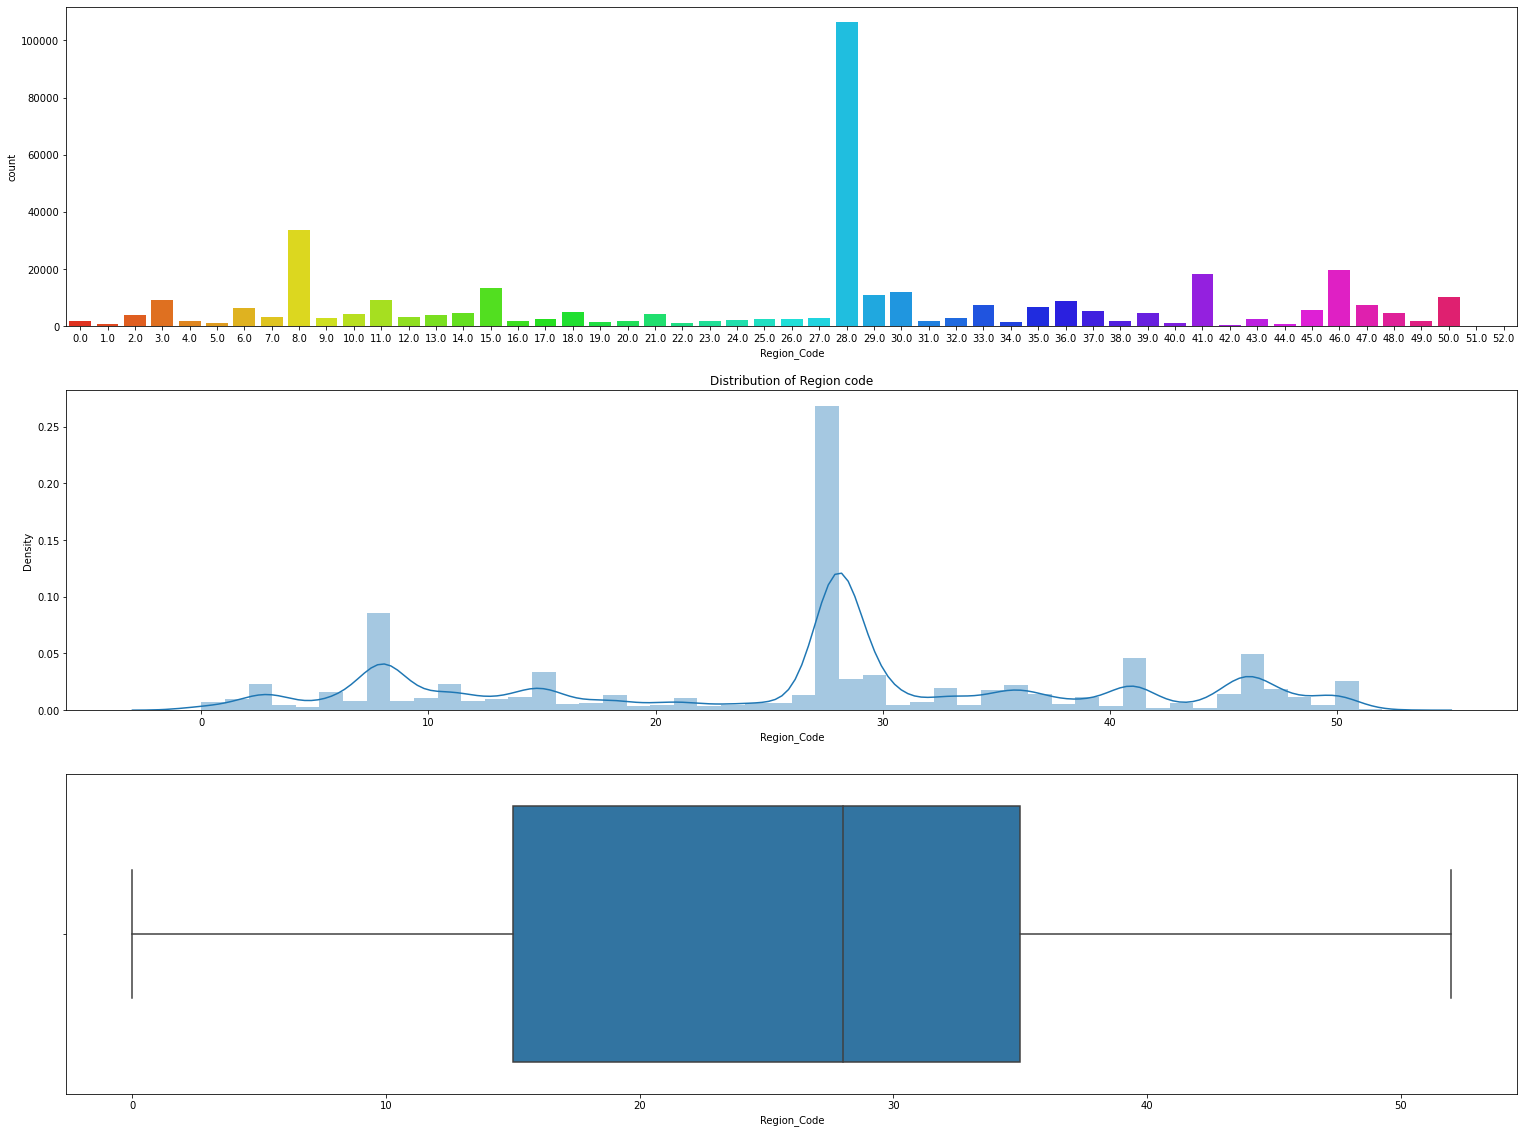

In [46]:
plt.figure(figsize=(26,20))
plt.subplot(3,1,1)
sns.countplot(train["Region_Code"],palette= 'hsv')


plt.subplot(3,1,2)
sns.distplot(train['Region_Code'])
plt.title('Distribution of Region code')


plt.subplot(3,1,3)
sns.boxplot(train['Region_Code'])
plt.show()

#### Most of the customer belongs to the region_code 28.0.
#### Customers from region code 28.0 are more likely to buy the insurance.
#### As we can see that there is no outliers in this column.

In [70]:
var=['Age','Vintage','Annual_Premium','Response']

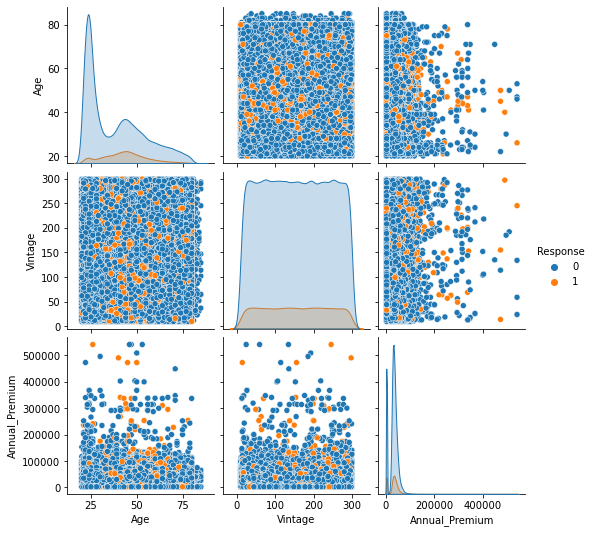

In [71]:
sns.pairplot(train[var],hue='Response');


## Correlation between all the attributes

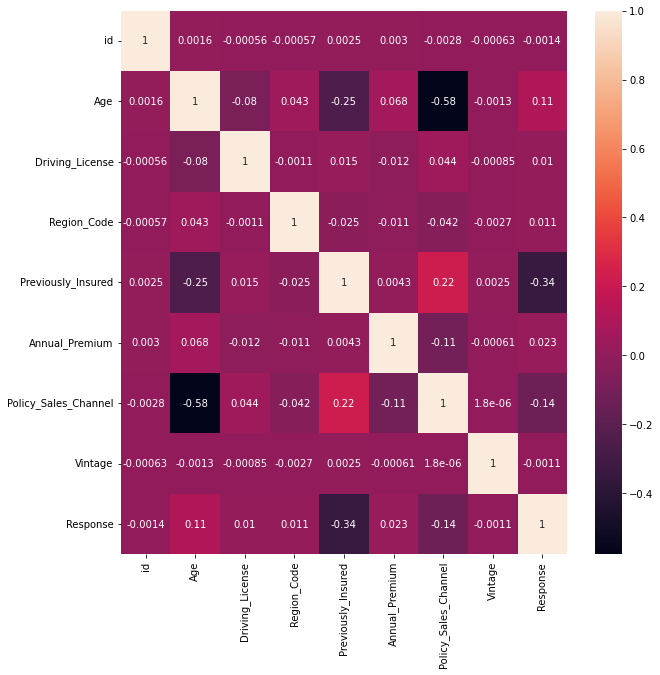

In [64]:
plt.figure(figsize=(10,10))
corr = train.corr()
sns.heatmap(corr,cbar=True,annot=True);

#### Policy sales channel is highly related to Previosly insured and it's corelation value is 0.22.
#### Policy sales channel is least related to Age and it's corelation value is -0.58.

In [37]:
def plot_num(var):
    
    plt.subplot(1,2,1)
    sns.histplot(train[var]);
    
    plt.subplot(1,2,2)
    sns.boxplot(y=train[var]);

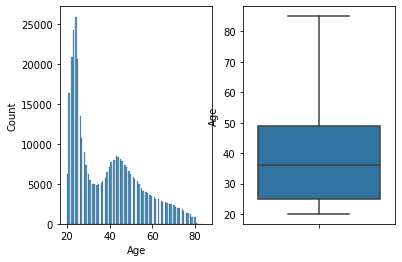

In [38]:
plot_num('Age')

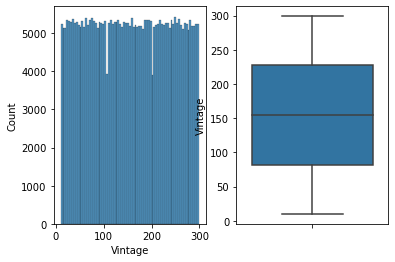

In [39]:
plot_num('Vintage')

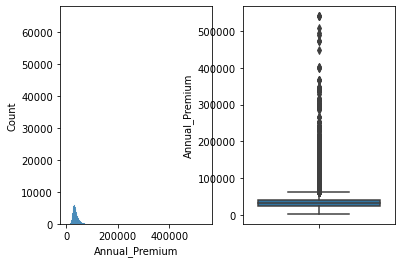

In [40]:
plot_num('Annual_Premium')

#### Age column don't have normal distribution.

#### Vintage variable has uniform distribution

#### Annual Premium follows normal distribution.

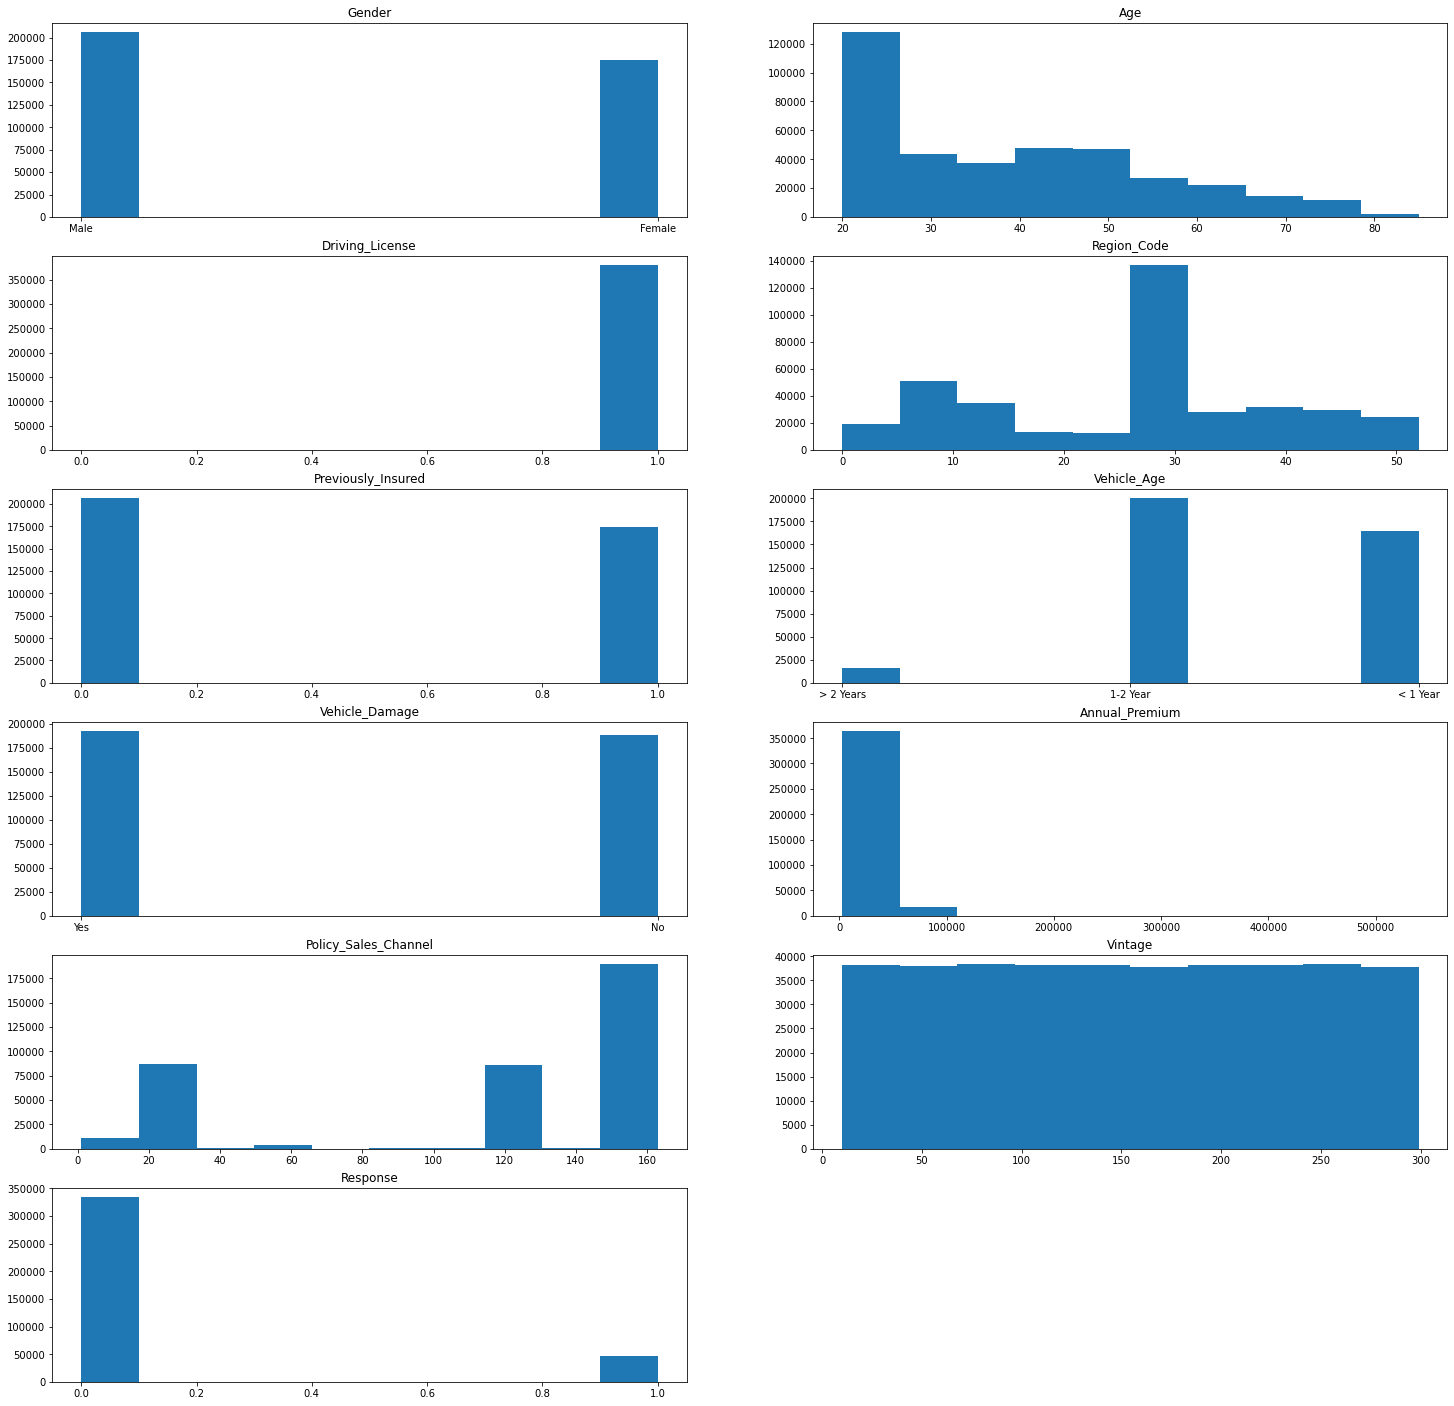

In [41]:
columns = [ 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']
fig = plt.figure(figsize=(25, 25))
i = 0
for col in columns:
    i+= 1
    fig.add_subplot(6,2,i)
    plt.hist(train[col])
    plt.title(col)
plt.show()

# CONCLUSION:

- There are 3 columns having float datatype , 6 columns of having int datatype and 3 are of categorical types.
- There are 381109 rows and 12 columns.
- Numpy and Pandas library are used to work with the dataset.
- Seaborn and Matplotlib is used for data visualization.
- We can see that there is no missing values in our dataset. Thus we do not need to impute any values and can proceed for further analysis.
- From the above plot and count , we can see that the response column is imbalanced.
- From the above plot and count , we can see that there are 334399 people with negative response and 46710 people with positive response.
- There are more males than females in the dataset.
- Approximately 176000 males who gave negative response and 27000 males who gave positive response.
- Approximately 153000 females who gave negative response and 24000 females who gave positive response.
- Above Plots shows that Male tend to subscribe to insurence more than female.
- There are 206089 males in the dataset that is 54.1 % of the total people.
- There are 175020 females in the dataset that is 45.9% of the total people.
- We can see that Age distribution is not normalized. Also the maximum frequency of age is around 24.
- People whose age is 24 are the one who are taking the insurance more.
- The density between age 20 to 30 is high because young people tend to take insurance more than any other age group.
- The density between age 70 to 90 is least because they are not interested in taking the health insurance.
- As we can see that there is no outlier in the age column.
- The minimum age is 20 and maximum is 85.
- The first quartile is around age 25.
- The second quartile is around age 36.
- The third quartile is around age 49.
- So most of the people have driving licence.
- 380297 people have driving license that is 99.8 % of the total count.
- 812 people don’t have driving license that is 0.2 % of the total count.
- Customers who have the DL are 99%
- People who have DL are more interested in insurance rather than those who doesn't have DL.
- We can see that more than 50% of the data is not previously Insured .
- There are 206481 people who have not insured previously that is 54.2% of the total count.
- There are 174628 people who have insured previously that is 45.8% of the total count.
- So we can see that most of the vehicles are pretty new with maximum of 1-2 years and less than a year's age
- There are 200316 vehicles of age 1-2 year that is 52.6 % of the total vehicles.
- There are 164786 vehicles of age less than 1 year that is 43.2 % of the total vehicles.
- There are 16007 vehicles of age more than 2 year that is 4.2 % of the total vehicles.
- We can see that buyers whose vehicle are between 1 to 2 years are more entrusted to buy insurance rather whose vehicle are less than 1 year or more than 2 years.¶
- From the above barplot we can see that number of records of damaged and non-damaged vehicles is approximately equal.
- There are 192413 vehicles that are damaged.
- There are 188696 vehicles that are not damaged. 
- We can see that vehicles with Damage has more number of responses than vehicles without damage¶
- Customers with vehicle damage are equallly distributed
- Customers with vehicle damage are more interested in the insurance.
- As it can be seen from the distribution plot that maximum annual premium is between 0 to 1lakh.
- There are huge number of outliers in the Annual Premium column.
- From the distribution plot we can infer that the annual premium variable is right skewed.
- There are 155 unique channels to reach the customer.
- 150 is the most frequent channel used to reach out the customer.
- This Column is uniformly distributed we can't do nothing much to this column
- Vintage= Number of Days, Customer has been associated with the company.
- Most of the customer belongs to the region_code 28.0.
- Customers from region code 28.0 are more likely to buy the insurance.
- As we can see that there is no outliers in this column.
- Policy sales channel is highly related to Previosly insured and it's corelation value is 0.22.
- Policy sales channel is least related to Age and it's corelation value is -0.58.
- Age column don't have normal distribution.
- Vintage variable has uniform distribution
- Annual Premium follows normal distribution.
